## 1

Perceptron classification accuracy 1.0


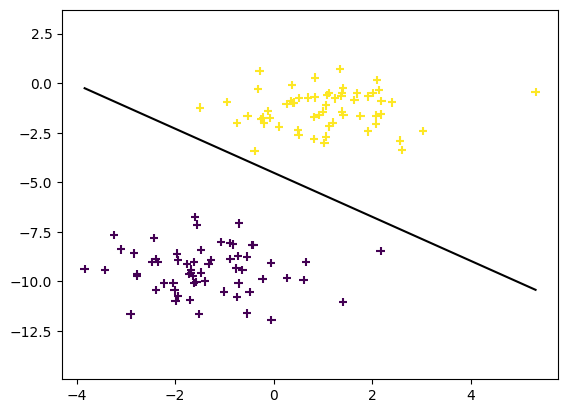

In [1]:
import numpy as np
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y > 0 , 1, 0)
        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias

        y_predicted = self.activation_func(linear_output)
        return y_predicted


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)
    print("Perceptron classification accuracy", accuracy(y_test, predictions))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="+", c=y_train)
    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])
    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])
    plt.show()


In [ ]:
## compressed version for 1
import numpy as np

step = lambda x: np.where(x > 0, 1, 0)

class Perceptron:
    def __init__(self, lr=0.01, n=1000):
        self.lr, self.n = lr, n

    def fit(self, X, y):
        self.w, self.b = np.zeros(X.shape[1]), 0
        y = np.where(y > 0, 1, 0)
        for _ in range(self.n):
            for i, x in enumerate(X):
                u = self.lr * (y[i] - step(np.dot(x, self.w) + self.b))
                self.w += u * x; self.b += u

    def predict(self, X):
        return step(np.dot(X, self.w) + self.b)


# Test
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    acc = lambda y, p: np.mean(y == p)

    X, y = datasets.make_blobs(150, 2, centers=2, cluster_std=1.05, random_state=2)
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=123)

    p = Perceptron()
    p.fit(Xtr, ytr)
    pred = p.predict(Xte)

    print("Perceptron classification accuracy", acc(yte, pred))

    x1, x2 = Xtr[:,0].min(), Xtr[:,0].max()
    y1, y2 = (-p.w[0]*x1 - p.b)/p.w[1], (-p.w[0]*x2 - p.b)/p.w[1]

    plt.scatter(Xtr[:,0], Xtr[:,1], c=ytr, marker="+")
    plt.plot([x1, x2], [y1, y2], "k")
    plt.ylim(Xtr[:,1].min()-3, Xtr[:,1].max()+3)
    plt.show()


## 2

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
422/422 - 4s - 10ms/step - accuracy: 0.8439 - loss: 0.5390 - val_accuracy: 0.9542 - val_loss: 0.1644
Epoch 2/15
422/422 - 2s - 5ms/step - accuracy: 0.9208 - loss: 0.2693 - val_accuracy: 0.9668 - val_loss: 0.1185
Epoch 3/15
422/422 - 2s - 4ms/step - accuracy: 0.9373 - loss: 0.2130 - val_accuracy: 0.9700 - val_loss: 0.0993
Epoch 4/15
422/422 - 3s - 7ms/step - accuracy: 0.9470 - loss: 0.1773 - val_accuracy: 0.9743 - val_loss: 0.0851
Epoch 5/15
422/422 - 2s - 5ms/step - accuracy: 0.9515 - loss: 0.1580 - val_accuracy: 0.9755 - val_loss: 0.0802
Epoch 6/15
422/422 - 2s - 5ms/step - accuracy: 0.9566 - loss: 0.1409 - val_accuracy: 0.9772 - val_loss: 0.0777
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.9586 - loss: 0.1343 - val_accuracy: 0.9793 - val_loss: 0.0769
Epoch 8/15
422/422 - 2s - 5ms/step - accuracy: 0.9622 - loss: 0.1209 - val_accuracy: 0.9792 - val_loss: 0.0704
Epoch 9/15
422/422 - 2s - 5ms/step - accuracy: 0.9660 - loss: 0.1099 - val_accuracy: 0.9783 - val_loss: 0.0712


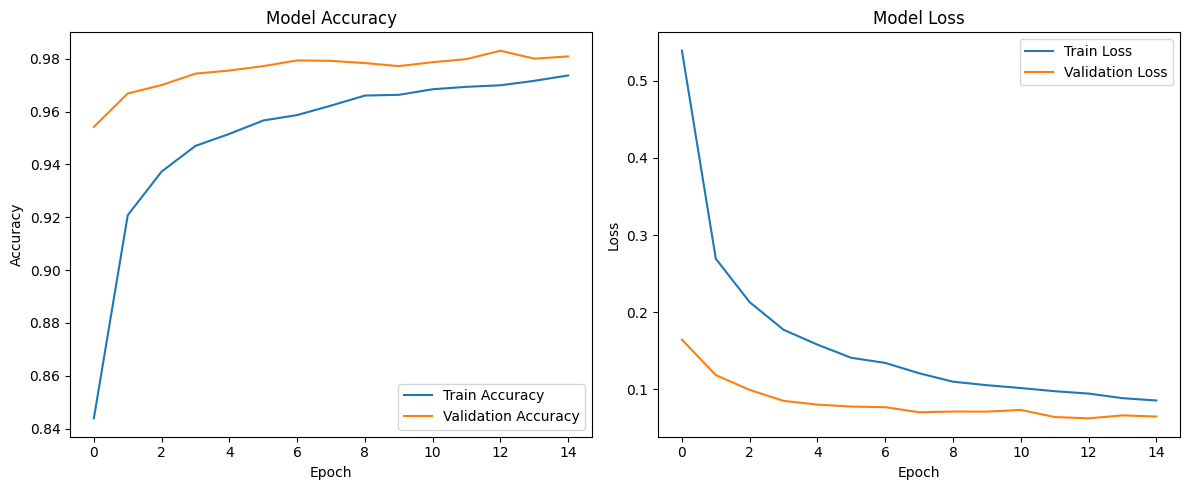


Model saved as 'mlp_mnist_model.h5'


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# 2. Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape the data (28x28 images → 784 features)
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Build the MLP Model with Dropout and Batch Normalization
model = models.Sequential([
    layers.Dense(128, input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 5. Train the Model and Store Training History
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)
# 6. Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 7. Plot Training Curves (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Save the Trained Model
model.save("mlp_mnist_model.h5")
print("\nModel saved as 'mlp_mnist_model.h5'")


Epoch 1/15
422/422 - 4s - 10ms/step - accuracy: 0.8533 - loss: 0.5088 - val_accuracy: 0.9590 - val_loss: 0.1528
Epoch 2/15
422/422 - 5s - 11ms/step - accuracy: 0.9240 - loss: 0.2551 - val_accuracy: 0.9680 - val_loss: 0.1092
Epoch 3/15
422/422 - 2s - 5ms/step - accuracy: 0.9390 - loss: 0.2033 - val_accuracy: 0.9760 - val_loss: 0.0862
Epoch 4/15
422/422 - 2s - 5ms/step - accuracy: 0.9473 - loss: 0.1743 - val_accuracy: 0.9748 - val_loss: 0.0853
Epoch 5/15
422/422 - 2s - 5ms/step - accuracy: 0.9535 - loss: 0.1545 - val_accuracy: 0.9783 - val_loss: 0.0797
Epoch 6/15
422/422 - 3s - 7ms/step - accuracy: 0.9574 - loss: 0.1400 - val_accuracy: 0.9787 - val_loss: 0.0729
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.9607 - loss: 0.1295 - val_accuracy: 0.9788 - val_loss: 0.0725
Epoch 8/15
422/422 - 2s - 5ms/step - accuracy: 0.9623 - loss: 0.1213 - val_accuracy: 0.9802 - val_loss: 0.0675
Epoch 9/15
422/422 - 2s - 5ms/step - accuracy: 0.9649 - loss: 0.1114 - val_accuracy: 0.9792 - val_loss: 0.0695

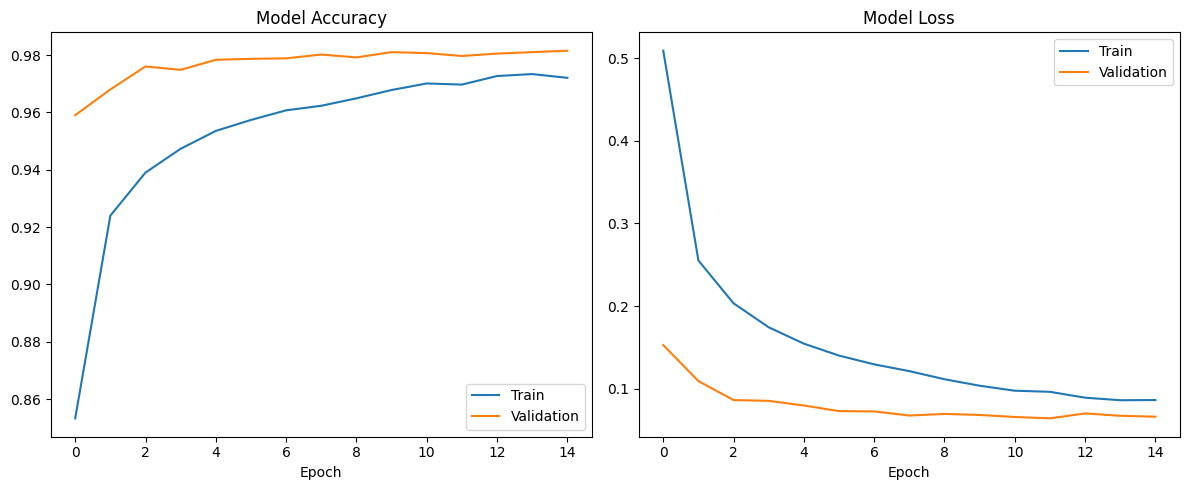


Model saved as 'mlp_mnist_model.h5'


In [6]:
# compresed version for 2
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load & preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 784).astype("float32") / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Build model
model = models.Sequential([
    layers.Dense(128, input_shape=(784,)),
    layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.3),
    layers.Dense(64),
    layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile & train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, batch_size=128,
                    validation_split=0.1, verbose=2)

# Evaluate
acc = model.evaluate(x_test, y_test, verbose=0)[1]
print(f"\nTest Accuracy: {acc:.4f}")

# Plot metrics
plt.figure(figsize=(12,5))
for i, m in enumerate([('accuracy','Accuracy'), ('loss','Loss')], 1):
    plt.subplot(1,2,i)
    plt.plot(history.history[m[0]], label='Train')
    plt.plot(history.history['val_'+m[0]], label='Validation')
    plt.title(f"Model {m[1]}"); plt.xlabel('Epoch'); plt.legend()
plt.tight_layout(); plt.show()

# Save model
model.save("mlp_mnist_model.h5")
print("\nModel saved as 'mlp_mnist_model.h5'")


## 3 

In [3]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# 2. Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 3. Normalize Pixel Values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0
# 4. Convert Labels to One-Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 5. Function to Create and Train a Simple Model with Different Activations
def test_activation(activation):
    print(f"\nTraining with activation = {activation}")
    # Build Model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    # Compile Model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    # Train Model (2 epochs for quick comparison)
    model.fit(x_train, y_train, epochs=2, batch_size=128, verbose=1)
    # Evaluate Model
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy with {activation}: {acc:.4f}")
# 6. Try Different Activation Functions
for act in ['relu', 'sigmoid', 'tanh']:
    test_activation(act)



Training with activation = relu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8006 - loss: 0.7247
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9387 - loss: 0.2161
Test Accuracy with relu: 0.9485

Training with activation = sigmoid
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7304 - loss: 1.1689
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9131 - loss: 0.3345
Test Accuracy with sigmoid: 0.9261

Training with activation = tanh
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8127 - loss: 0.6888
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9346 - loss: 0.2320
Test Accuracy with tanh: 0.9455


In [ ]:
#compressed version for 3
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load & preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Train & evaluate model with different activations
def test_activation(act):
    print(f"\nTraining with activation = {act}")
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation=act),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=2, batch_size=128, verbose=1)
    acc = model.evaluate(x_test, y_test, verbose=0)[1]
    print(f"Test Accuracy with {act}: {acc:.4f}")

for act in ('relu', 'sigmoid', 'tanh'):
    test_activation(act)



Training with activation = relu
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8067 - loss: 0.7047
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9382 - loss: 0.2206
Test Accuracy with relu: 0.9508

Training with activation = sigmoid
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7247 - loss: 1.1539
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9095 - loss: 0.3367
Test Accuracy with sigmoid: 0.9265

Training with activation = tanh
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8096 - loss: 0.7003
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9341 - loss: 0.2396
Test Accuracy with tanh: 0.9430


## 4

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3494 - loss: 1.7536 - val_accuracy: 0.5544 - val_loss: 1.2467
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.5736 - loss: 1.2052 - val_accuracy: 0.5949 - val_loss: 1.1376
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6320 - loss: 1.0378 - val_accuracy: 0.6538 - val_loss: 1.0042
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.6778 - loss: 0.9222 - val_accuracy: 0.6756 - val_loss: 0.9398
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.7078 - loss: 0.8498 - val_accuracy: 0.6796 - val_loss: 0.9254
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7283 - loss: 0.7822 - val_accuracy: 0.6889 - val_loss: 0.8943
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7492 - loss: 0.7216 - val_accuracy: 0.6862 - val_loss: 0.9043
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7614 -

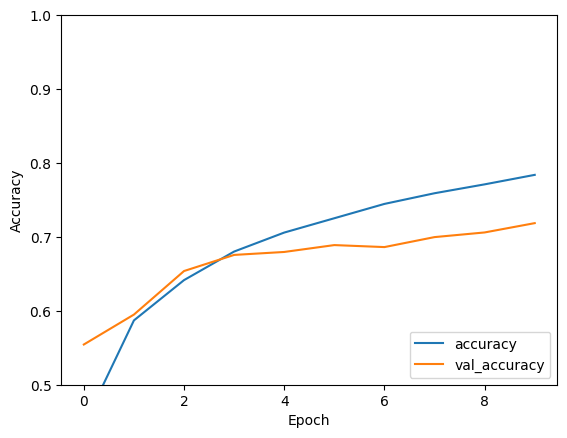

313/313 - 3s - 10ms/step - accuracy: 0.7186 - loss: 0.8521
Test Accuracy: 0.7185999751091003
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
cat


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# 1. Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# 2. Build the CNN model
model = models.Sequential()
# Convolutional Base
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Dense Layers (Classifier)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # Output layer with 10 units for 10 classes
# 3. Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 4. Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
# 5. Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test Accuracy: {test_acc}")
# Make predictions on a sample image
predictions = model.predict(test_images)
print(class_names[tf.argmax(predictions[0])])


In [ ]:
## compressed version for 4
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load & normalize data
(x_tr, y_tr), (x_te, y_te) = datasets.cifar10.load_data()
x_tr, x_te = x_tr/255.0, x_te/255.0

classes = ['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck']

# Model
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile & train
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

h = model.fit(x_tr, y_tr, epochs=10, validation_data=(x_te, y_te))

# Plot accuracy
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.ylim([0.5,1]); plt.legend(); plt.show()

# Evaluate & predict
print("Test Accuracy:", model.evaluate(x_te, y_te, verbose=2)[1])
pred = model.predict(x_te)
print(classes[tf.argmax(pred[0])])


Epoch 1/10


## 5

In [ ]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import numpy as np
# 2. Load and Preprocess the IMDB Dataset
VOCAB_SIZE = 10000     # Only keep the top 10,000 most frequent words
MAXLEN = 200           # Pad or truncate each review to 200 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)
# Pad sequences to make all reviews the same length
x_train = pad_sequences(x_train, maxlen=MAXLEN)
x_test = pad_sequences(x_test, maxlen=MAXLEN)
# 3. Build the Simple RNN Model
rnn_model = Sequential([
    Embedding(VOCAB_SIZE, 32, input_length=MAXLEN),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
# 4. Compile and Train the Simple RNN Model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=2)
# 5. Evaluate the Simple RNN Model
rnn_loss, rnn_acc = rnn_model.evaluate(x_test, y_test, verbose=0)
print(f"\nSimpleRNN Test Accuracy: {rnn_acc:.4f}")
# 6. Build the LSTM Model
lstm_model = Sequential([
    Embedding(VOCAB_SIZE, 32, input_length=MAXLEN),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
# 7. Compile and Train the LSTM Model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=2)
# 8. Evaluate the LSTM Model
lstm_loss, lstm_acc = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_acc:.4f}")
# 9. Predict on a Random Sample Review
index = np.random.randint(0, len(x_test))
sample = x_test[index:index+1]
true_label = y_test[index]
rnn_pred = rnn_model.predict(sample)[0][0]
lstm_pred = lstm_model.predict(sample)[0][0]
# 10. Decode the Review Text
def decode_review(sequence):
    word_index = imdb.get_word_index()
    reverse_word_index = {v+3: k for k, v in word_index.items()}
    reverse_word_index[0] = "<PAD>"
    reverse_word_index[1] = "<START>"
    reverse_word_index[2] = "<UNK>"
    reverse_word_index[3] = "<UNUSED>"
    return " ".join([reverse_word_index.get(i, "?") for i in sequence])
decoded_review = decode_review(x_test[index])
# 11. Display the Results
print("\n==")
print("Sample Review:\n")
print(decoded_review)
print("\nTrue Label:", "Positive" if true_label == 1 else "Negative")
print(f"RNN Prediction:  {rnn_pred:.3f} → {'Positive' if rnn_pred > 0.5 else 'Negative'}")
print(f"LSTM Prediction: {lstm_pred:.3f} → {'Positive' if lstm_pred > 0.5 else 'Negative'}")
print("==")


In [ ]:
## compressed version for 5
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import numpy as np

# Constants & data
V, L = 10000, 200
(xtr, ytr), (xte, yte) = imdb.load_data(num_words=V)
xtr, xte = pad_sequences(xtr, L), pad_sequences(xte, L)

# Model builder
def build(cell):
    return Sequential([Embedding(V, 32, input_length=L), cell(32), Dense(1, 'sigmoid')])

# Train & evaluate
models = {'SimpleRNN': SimpleRNN, 'LSTM': LSTM}
trained = {}

for name, cell in models.items():
    m = build(cell)
    m.compile('adam', 'binary_crossentropy', ['accuracy'])
    m.fit(xtr, ytr, epochs=3, batch_size=128, validation_split=0.2, verbose=2)
    acc = m.evaluate(xte, yte, verbose=0)[1]
    print(f"\n{name} Test Accuracy: {acc:.4f}")
    trained[name] = m

# Random sample prediction
i = np.random.randint(len(xte))
sample, label = xte[i:i+1], yte[i]
rnn_p  = trained['SimpleRNN'].predict(sample)[0][0]
lstm_p = trained['LSTM'].predict(sample)[0][0]

# Decode review
wi = imdb.get_word_index()
rev = {v+3:k for k,v in wi.items()} | {0:'<PAD>',1:'<START>',2:'<UNK>',3:'<UNUSED>'}
text = " ".join(rev.get(j,'?') for j in xte[i])

# Output
print("\n==\nSample Review:\n")
print(text)
print("\nTrue Label:", "Positive" if label else "Negative")
print(f"RNN Prediction:  {rnn_p:.3f} → {'Positive' if rnn_p>0.5 else 'Negative'}")
print(f"LSTM Prediction: {lstm_p:.3f} → {'Positive' if lstm_p>0.5 else 'Negative'}")
print("==")


## 6

In [ ]:
#Import Required Libraries
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
# 2. Define True Labels and Predicted Outputs
y_true = [1, 0, 1, 1, 0, 0, 1, 0]     # Actual class labels
y_pred = [1, 0, 1, 0, 0, 1, 1, 0]     # Predicted class labels
y_prob = [0.9, 0.2, 0.8, 0.4, 0.3, 0.7, 0.85, 0.1]   # Predicted probabilities (for ROC)
# 3. Calculate Evaluation Metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
# 4. Display the Metrics
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1-Score:", round(f1, 2))
# 5. Generate ROC Curve Values
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
# 6. Plot the ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label="ROC Curve (AUC = %.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
